In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("spam2.csv",encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
999,ham,"Aight will do, thanks again for comin out",NaN,NaN,NaN
1524,ham,Hi:)cts employee how are you?,NaN,NaN,NaN
876,ham,Are you in castor? You need to see something,NaN,NaN,NaN
4968,ham,I will cme i want to go to hos 2morow. After t...,NaN,NaN,NaN
4291,ham,G.W.R,NaN,NaN,NaN
4919,ham,"G says you never answer your texts, confirm/deny",NaN,NaN,NaN
252,ham,What you doing?how are you?,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# data cleaning
# eda
# text processing
# model building 
# evaluation
# improve
# website
# deploy

### Data Cleaning 


In [ ]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(4)

,v1,v2
5019,ham,"It's cool, we can last a little while. Getting..."
3510,ham,I'm serious. You are in the money base
2802,spam,FreeMsg>FAV XMAS TONES!Reply REAL
1855,ham,K.:)you are the only girl waiting in reception...


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(4)

,target,text
2605,ham,\HELLO U.CALL WEN U FINISH WRK.I FANCY MEETIN ...
1376,ham,Auntie huai juan never pick up her phone
2401,spam,Babe: U want me dont u baby! Im nasty and have...
4753,ham,Ok lor... Or u wan me go look 4 u?


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check for duplication
df.duplicated().sum()

403

In [ ]:
# remove duplicate
df=df.drop_duplicates(keep='first')
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [ ]:
df.shape

(5169, 2)

### EDA


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
 pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\het patel\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
import matplotlib.pyplot as plt

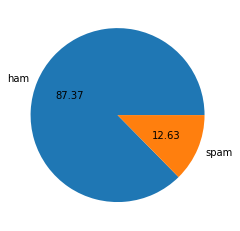

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
# so data is imballenced

In [ ]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\het patel\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Het
[nltk_data]     patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['no_of_characters']=df['text'].apply(len)
df['no_of_characters']

C:\Users\Het patel\AppData\Local\Temp\ipykernel_9372\3274985574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_characters']=df['text'].apply(len)


0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: no_of_characters, Length: 5169, dtype: int64

In [ ]:
df.head()

,target,text,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# no of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [ ]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [ ]:
df['no_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


C:\Users\Het patel\AppData\Local\Temp\ipykernel_9372\1611403231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
df.head()

,target,text,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# no of sentence
df['no_of_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Het patel\AppData\Local\Temp\ipykernel_9372\3539367256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.describe

<bound method NDFrame.describe of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      no_of_characters  no_of_words  no_of_sentence  
0                  111           24               2  
1                   29            8               2  

In [ ]:
df[['no_of_characters','no_of_words','no_of_sentence']].describe()

,no_of_characters,no_of_words,no_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# ham
df[df['target']==0][['no_of_characters','no_of_words','no_of_sentence']].describe()

,no_of_characters,no_of_words,no_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# spam
df[df['target']==1][['no_of_characters','no_of_words','no_of_sentence']].describe()

,no_of_characters,no_of_words,no_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\het patel\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='no_of_characters', ylabel='Count'>

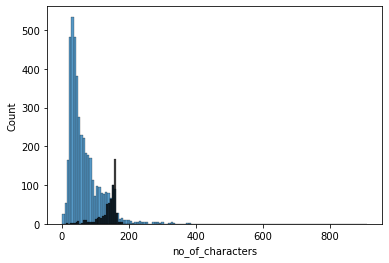

In [ ]:
sns.histplot(df[df['target']==0]['no_of_characters'])
sns.histplot(df[df['target']==1]['no_of_characters'],color='black')

<AxesSubplot:xlabel='no_of_words', ylabel='Count'>

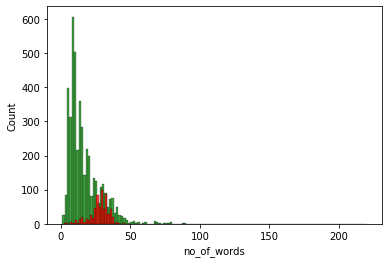

In [ ]:
sns.histplot(df[df['target']==0]['no_of_words'],color='green')
sns.histplot(df[df['target']==1]['no_of_words'],color='red')

<AxesSubplot:xlabel='no_of_sentence', ylabel='Count'>

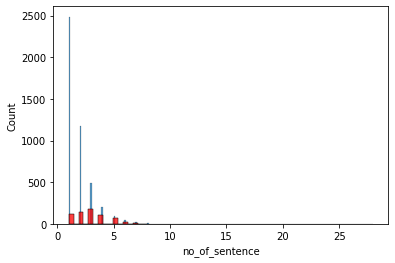

In [ ]:
sns.histplot(df[df['target']==0]['no_of_sentence'])
sns.histplot(df[df['target']==1]['no_of_sentence'],color='red')

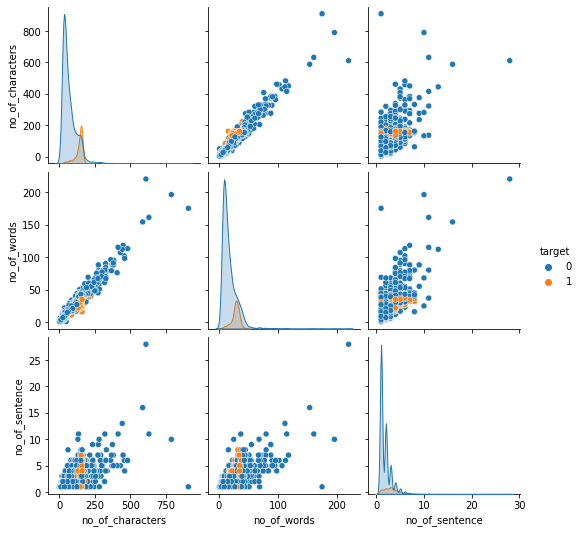

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
df.corr()

,target,no_of_characters,no_of_words,no_of_sentence
target,1.000000,0.384717,0.262984,0.284901
no_of_characters,0.384717,1.000000,0.965770,0.638143
no_of_words,0.262984,0.965770,1.000000,0.684541
no_of_sentence,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

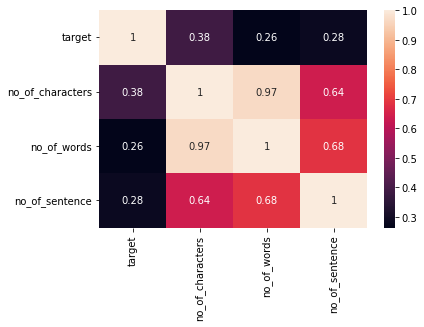

In [ ]:
sns.heatmap(df.corr(),annot=True)

### Data preprocessing
lowercase,
tokenization,
removing special characters,
removing stop words and punctuation,
steeming : it means same meaning of words are convert into one common word ex. dance,dancing convert into dance.

In [ ]:
# which word is stop words
nltk.download('stopwords')
# from nltk.corpus import stopwords
# stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Het
[nltk_data]     patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# which word is stop words
# nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def transformtext(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)
        

In [ ]:
transformtext('hi am Virat Kohli HET 20 %%&&')

'hi virat kohli het 20'

In [ ]:
df['transform_text']=df['text'].apply(transformtext)
df['transform_text']

C:\Users\Het patel\AppData\Local\Temp\ipykernel_9372\3774532932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=df['text'].apply(transformtext)


0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transform_text, Length: 5169, dtype: object

In [ ]:
df.head()

,target,text,no_of_characters,no_of_words,no_of_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\het patel\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
# display some importatnt word from wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=""))

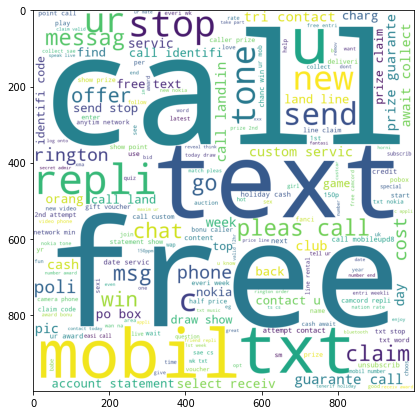

In [ ]:
plt.figure(figsize=(12,7))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=""))

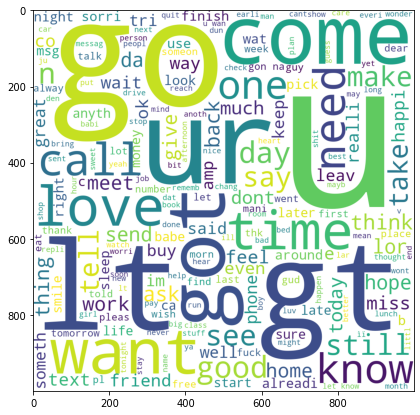

In [ ]:
plt.figure(figsize=(12,7))
plt.imshow(spam_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

c:\users\het patel\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


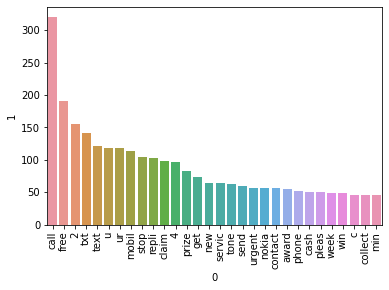

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [ ]:
X.shape
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))